In [1]:
##读取宏观数据
from WindPy import *



In [2]:
w.start()
w.isconnected()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2021 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


True

In [3]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


In [4]:

from datetime import date
today_for_api  = str(date.today())
import pandas as pd
import numpy as np
#######图形模版
import seaborn as sns
cm=sns.color_palette("Spectral", as_cmap=True)
#cm = sns.light_palette("Spectral", as_cmap=True)
import matplotlib.pyplot as plt
plt.style.use("seaborn-dark")
font = ['Songti SC']
parameters = {'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          "font.family" : "sans-serif",
          "font.sans-serif":font,
          'font.size':15,
          "axes.unicode_minus":False}
plt.rcParams.update(parameters)



/var/folders/bg/h2_d2l2939102wvpkt70y0_00000gn/T/ipykernel_13312/2770786800.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-dark")


# 宏观数据

In [7]:
today_for_api

'2022-12-15'

In [5]:
error,dp_0 =w.wsd("000300.SH","CLOSE", "2000-01-01", today_for_api, "PriceAdj=F",usedf=True)
dp_0.index =pd.to_datetime(dp_0.index ,infer_datetime_format=True)
dp_0 =dp_0.resample("M").ffill()
dp_0.index = dp_0.index.to_period("M")
data_macro=pd.DataFrame(index = dp_0.index,columns =["dp","dy","ep","de","svar","bm","ntis","tbl","ity","itr","tms","dfy","infl"])






error,dp_1 =w.wsd("000300.SH", "dividendyield2", "2000-01-01", "2022-10-26", "rptYear=2020;Period=Q",usedf=True)
dp_1.index =pd.to_datetime(dp_1.index ,infer_datetime_format=True)
dp_1 =dp_1.resample("M").ffill()
dp_1.index = dp_1.index.to_period("M")

data_macro["dp"] = np.log(dp_1)
#print(data_macro)

#data_macro["dp"].plot()

error,dp_close =w.wsd("000300.SH","close", "2000-01-01", today_for_api, "PriceAdj=F",usedf=True)
dp_close.index =pd.to_datetime(dp_close.index ,infer_datetime_format=True)
dr = dp_close/dp_close.shift(252)

dr =dr.resample("M").last()
dr.index = dr.index.to_period("M")


dp_2 = dr["CLOSE"]*dp_1["DIVIDENDYIELD2"]

#dp_2.dropna().plot()

data_macro["dy"]=np.log(dp_2)


error,df_pe=w.edb("M0342074,Z9897715", "2000-01-01", today_for_api, "Fill=Previous",usedf=True);
df_pe.index =pd.to_datetime(df_pe.index ,infer_datetime_format=True)

df_pe =df_pe.resample("M").last()
df_pe.index = df_pe.index.to_period("M")
dp_3=1/df_pe
#dp_3.plot()
data_macro["ep"]=np.log(dp_3["M0342074"])



data_macro["de"] = data_macro["dp"]-data_macro["ep"]

error,df_close=w.edb("M0020209", "2000-01-01", today_for_api, "Fill=Previous",usedf=True);
df_close.index =pd.to_datetime(df_close.index)
dr = df_close/df_close.shift(1)-1
dp_stock_var = dr**2

dp_stock_var =dp_stock_var.resample("M").sum()
dp_stock_var.index = dp_stock_var.index.to_period("M")


data_macro["svar"] =dp_stock_var

error,df_BM=w.edb("M0342075", "2000-01-01", today_for_api, "Fill=Previous",usedf=True);
df_BM.index =pd.to_datetime(df_BM.index)



df_BM =df_BM.resample("M").last()
df_BM.index = df_BM.index.to_period("M")


data_macro["bm"] =1/df_BM

##net equity expansion 
error,data_stock=w.edb("M0024248,M6093018", "2000-01-01", today_for_api, "Fill=Previous",usedf=True);
__data_stock=data_stock.rolling(window=12).mean()
__data_stock.index =pd.to_datetime(__data_stock.index)
dp_7 =__data_stock["M0024248"]*12/__data_stock["M6093018"]
#dp_7.plot()


dp_7 =dp_7.resample("M").last()
dp_7.index = dp_7.index.to_period("M")
data_macro["ntis"]=dp_7

##Treasury Bills
error,df_89=w.edb("S0059741,S0059749", "2000-01-01", today_for_api, "Fill=Previous",usedf=True);
df_89.index =pd.to_datetime(df_89.index ,infer_datetime_format=True)
#df_89.plot()

df_89 =df_89.resample("M").last()
df_89.index = df_89.index.to_period("M")


data_macro[["tbl","ity"]]= df_89/100

error,df_close_bond = w.wsd("CBA00351.CS", "close", "2000-01-01", "2022-10-26", usedf=True)
df_close_bond.index =pd.to_datetime(df_close_bond.index,infer_datetime_format=True)
df_bond_close_month=df_close_bond.resample("M").last()
dp_10 = df_bond_close_month/df_bond_close_month.shift(1)-1
#dp_10.plot()





#df_10 =df_10.resample("M").last()
dp_10.index = dp_10.index.to_period("M")


data_macro["itr"]= dp_10

data_macro["tms"] = data_macro["ity"] -data_macro["tbl"]
error,df_11_12=w.edb("M1000396,M1000370", "2000-01-01", today_for_api, "Fill=Previous",usedf=True);
df_11_12.index =pd.to_datetime(df_11_12.index ,infer_datetime_format=True)



df_11_12_month=df_11_12.resample("M").last()





#df_10 =df_10.resample("M").last()
df_11_12_month.index = df_11_12_month.index.to_period("M")

data_macro["dfy"]= (df_11_12_month["M1000396"]-df_11_12_month["M1000370"])/100
error,df_13=w.edb("M0000612", "2000-01-01", today_for_api, "Fill=Previous",usedf=True);
df_13.index =pd.to_datetime(df_13.index ,infer_datetime_format=True)




df_13_month=df_13.resample("M").last()

#df_13_month.plot()



#df_10 =df_10.resample("M").last()
df_13_month.index = df_13_month.index.to_period("M")

data_macro["infl"]= df_13_month



def value_tran_zscore(data):
    data_mean =data.mean()
    data_std = data.std()
    zscore= (data.values[-1]-data_mean)/data_std
    return zscore
data_zscore = data_macro

data_zscore= data_macro.dropna().rolling(window =3*12).apply(value_tran_zscore)

data_zscore.dropna()



,dp,dy,ep,de,svar,bm,ntis,tbl,ity,itr,tms,dfy,infl
2010-09,0.568836,0.433664,1.083269,-0.218234,-1.137236,0.964653,-1.745561,-0.102228,-0.576221,-0.674961,-0.328363,0.896509,0.177200
2010-10,0.526684,0.807082,0.847143,-0.016819,-0.744689,0.638690,-0.867193,-0.041876,0.189805,-1.698747,0.223152,1.150598,0.440157
2010-11,0.484165,0.388356,0.996986,-0.226694,-0.198148,0.950782,-1.001173,0.939443,0.850266,-2.030975,-0.792753,1.326470,0.677774
2010-12,0.275470,0.278767,0.935479,-0.477168,-0.937246,0.949412,-0.291912,1.300987,0.718144,0.579857,-1.442341,1.274187,0.547598
2011-01,0.216694,0.204014,0.886201,-0.554808,-0.735156,0.803818,0.088537,1.544419,1.054821,-0.512483,-1.554819,1.618934,0.673704
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06,-0.394763,-1.374332,0.199011,-0.761972,-0.190868,-0.007571,-1.882955,-1.102115,-0.706251,-0.614269,1.080296,-0.924577,0.316541
2022-07,-0.350462,-1.697815,0.860564,-1.603419,-0.597124,0.608357,-1.392461,-1.286442,-0.964761,0.586300,1.159342,-0.861022,0.448984
2022-08,-0.303845,-1.404566,1.103055,-1.794249,-0.409955,1.107893,-0.668760,-1.282802,-1.507167,0.905264,0.714709,-0.159454,0.324827
2022-09,2.823797,-0.320505,1.535375,1.091568,-0.484878,1.653164,-0.530975,-0.895976,-0.812027,-1.083184,0.700063,-0.497493,0.525596


In [15]:
#w.isconnected()
#error,df= w.edb(str_code_, begin_for_api, today_for_api, "Fill=Previous",usedf=True);


# 指数和风格数据

In [6]:
begin_for_api  = "2005-01-01"
import pandas as pd
data_code = pd.read_excel("/Users/xinyuexu/Public/multi_strategy/wind金融数据.xlsx",sheet_name="WSD_数据字段")
data_code = data_code.query("FOF研究==1")
name= data_code[["代码","名称"]].set_index("代码").to_dict()
str_code_=""
for i,j in enumerate(data_code["代码"]):
        
    if i >0:
        str_code_ = str_code_+","+str(j)
    else:
        str_code_ = str_code_+str(j)

        
error,df= w.edb(str_code_, begin_for_api, today_for_api, "Fill=Previous",usedf=True);
#error,_data_ = w.wsd(str_code_, "close", "2022-01-01", today_for_api, "PriceAdj=F",usedf=True);
df.index =pd.to_datetime(df.index,infer_datetime_format=True).to_period("D")

df=df.rename(columns=name["名称"])

df_ret_ratio=np.log(df)-np.log(df.shift(1))

df_ret_ratio_mean_monthly=df_ret_ratio.resample("M").sum()
df_ret_ratio_std_monthly=np.sqrt((df_ret_ratio**2).resample("M").sum())
df_sharpe =df_ret_ratio_mean_monthly/df_ret_ratio_std_monthly

df_sharpe.mean()

# fig,ax= plt.subplots(1,1,figsize=(10,6))
# ax.plot(data_macro["tms"].index.to_timestamp(),data_macro["tms"].values)
# ax1= ax.twinx()
# ax1.plot(df["MSCI中国A股(人民币)"].index.to_timestamp(),df["MSCI中国A股(人民币)"].values,"r")

MSCI中国A股(人民币)          0.150962
MSCI中国A股在岸低波(人民币)      0.164236
MSCI中国A股在岸公司质量(人民币)    0.189923
MSCI中国A股在岸价值(人民币)      0.156354
MSCI中国A股在岸成长(人民币)      0.186582
MSCI中国A股在岸中小盘(人民币)     0.216135
MSCI中国A股在岸动能(人民币)      0.103249
dtype: float64

<AxesSubplot: >

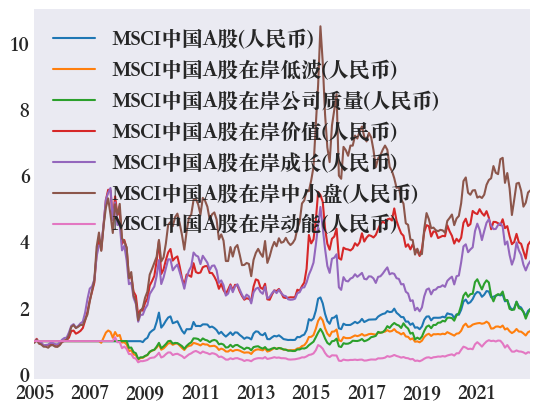

In [20]:
np.exp(df_ret_ratio_mean_monthly.cumsum()).plot()

In [21]:
## 数据从2008年开始
df_ret_ratio= df_ret_ratio.dropna()

In [11]:
#from utility import *
#from utility_data_deal import *

# 公募基金数据

In [22]:
fund_file_name="/Users/xinyuexu/Public/multi_strategy/data_managers/data/FOF数据/fund_i_data_July.xlsx"

In [88]:
data_book = pd.ExcelFile(fund_file_name)
book_name = data_book.sheet_names;
dic_book2index ={}
reverse_dic = {}
for i in book_name:
    data_book_i = pd.read_excel(fund_file_name,skiprows=[0,2,3,4],sheet_name =i,index_col=0,parse_dates=True)

    dic_book2index[i] = data_book_i.columns
    for j in data_book_i.columns:
        reverse_dic[j] =i


In [89]:
str_code_=""
for i,j in enumerate(dic_book2index["中盘均衡"]):
        
    if i >0:
        str_code_ = str_code_+","+str(j)
    else:
        str_code_ = str_code_+str(j)
str_code_fund=str_code_
error,df_fund= w.wsd(str_code_fund,"NAV_adj", begin_for_api, today_for_api, "Fill=Previous","Period=M",usedf=True);
      
df_fund.index =pd.to_datetime(df_fund.index,infer_datetime_format=True)
#df_fund=df_fund.resample("M").last()
df_fund=df_fund.resample("M").last()

error,df_fund_name= w.wsd(str_code_fund,"name_official", "2022-03-01", "2022-03-01", "Fill=Previous","Period=M",usedf=True);




In [90]:
fund_name=df_fund_name.to_dict()

df_fund.columns =df_fund.columns.map(fund_name["NAME_OFFICIAL"])

df_fund_log=df_fund.transform(np.log)
df_fund_ret =df_fund_log-df_fund_log.shift(1)

In [91]:
data_fund = (df_fund_ret["2010":]+1).cumprod().dropna(axis=1)

In [92]:
df_fund_ret["2010":].dropna(axis=1)

,浦银安盛精致生活混合,金鹰红利价值混合A,金鹰中小盘精选混合,融通内需驱动混合A/B,国泰金鹰增长灵活配置混合,华夏盛世混合
2010-01-31,-0.063388,-0.062397,-0.023445,-0.096881,-0.074351,-0.096099
2010-02-28,0.024244,0.015837,0.048781,0.032035,0.036788,0.027809
2010-03-31,0.036261,0.022271,0.018685,0.000000,0.028486,0.016737
2010-04-30,-0.045283,-0.062435,-0.023734,-0.004938,-0.051452,-0.057647
2010-05-31,-0.054851,-0.035046,-0.052810,-0.063351,-0.053129,-0.039221
...,...,...,...,...,...,...
2022-08-31,-0.087566,-0.012516,-0.039593,-0.034756,-0.057918,-0.035754
2022-09-30,-0.101090,-0.029218,-0.096503,-0.011114,-0.058318,-0.073369
2022-10-31,0.030296,0.030576,0.119926,-0.029027,-0.018026,-0.002220
2022-11-30,-0.024226,-0.011548,0.001095,0.062004,0.034252,0.025596


# 指数与风格数据收益率：夏普比例确认

In [3]:
from utility_data_deal import orthogonalized_factors

In [4]:
factor_adj,index_adj=orthogonalized_factors(df_ret_ratio,df_ret_ratio.columns[0],df_ret_ratio.columns[1:])

NameError: name 'df_ret_ratio' is not defined

In [39]:
#(factor_adj+1).cumprod().plot()

In [27]:
#(df_ret_ratio+1).cumprod().plot()


In [95]:
df_ret_ratio_mean_monthly=index_adj.resample("M").sum()
df_ret_ratio_std_monthly=np.sqrt((index_adj**2).resample("M").sum())
df_sharpe =df_ret_ratio_mean_monthly/df_ret_ratio_std_monthly

#  总体数据

In [ ]:
import pickle


from datetime import date
today_for_api  = str(date.today())
import pandas as pd
import numpy as np
#######图形模版
import seaborn as sns
cm=sns.color_palette("Spectral", as_cmap=True)
#cm = sns.light_palette("Spectral", as_cmap=True)
import matplotlib.pyplot as plt
plt.style.use("seaborn-dark")
font = ['Songti SC']
parameters = {'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          "font.family" : "sans-serif",
          "font.sans-serif":font,
          'font.size':15,
          "axes.unicode_minus":False}
plt.rcParams.update(parameters)


In [98]:

# f1 = open('temp.pkl', 'wb')  
# pickle.dump(data_macro.dropna(), f1)
# pickle.dump(data_zscore, f1)
# pickle.dump(df_ret_ratio, f1)

# pickle.dump(index_adj, f1)
# pickle.dump(df_fund_ret, f1)
# f1.close()  

In [ ]:
f2 = open('temp.pkl', 'rb')  
macro_data = pickle.load(f2)  
macro_zscore = pickle.load(f2)  
index_orig = pickle.load(f2)  
index_transformer = pickle.load(f2)  
df_fund = pickle.load(f2)  
df_fund.index=df_fund.index.to_period("M")
f2.close() 

df_ret_ratio=index_orig

# 基于月度数据夏普估计：夏普方法2

#Whitelaw（1997）


index_sharpe=index_orig

df_ret_ratio_mean_monthly=index_sharpe.resample("M").sum()
df_ret_ratio_std_monthly=np.sqrt((df_ret_ratio**2).resample("M").sum())
df_sharpe =df_ret_ratio_mean_monthly/df_ret_ratio_std_monthly

df_sharpe.mean()




# def Bootstrap_SR_IR(factor_adjust,B:int =500,b_star_cb:int =36)-> List[float]:
#     """B代表bootstrap的次数，b_star_cb代表时间序列block的长度"""

  
    # number of replications for bootstraps (number of resampled time-series to generate)
  
  
#     y_star_cb   = circular_block_bootstrap(factor_adjust, 
#                                    block_length=b_star_cb, 
#                                    replications=B, 
#                                    replace=True)
    
    
#     IR_estimate_from_bootstrap = np.zeros((B,np.shape(factor_adjust)[1]))

#     for b in range(B):
       
  
#        IR_estimate_from_bootstrap[b,:] =  np.mean(y_star_cb[b,:,:],axis=0)/np.std(y_star_cb[b,:,:],axis=0)
#     #print(np.mean(factor_adjust*12,axis=0))
#     #print(np.std(factor_adjust*12,axis=0))
#     return [np.mean(factor_adjust,axis=0)/np.std(factor_adjust,axis=0),np.mean(IR_estimate_from_bootstrap,axis =0),np.std(IR_estimate_from_bootstrap,axis=0)]



from recombinator.block_bootstrap import circular_block_bootstrap

y_star_cb   = circular_block_bootstrap(df_sharpe, 
                               block_length=36, 
                               replications=500, 
                               replace=True)




IR_estimate_from_bootstrap = np.zeros((500,np.shape(y_star_cb)[2]))
for b in range(500):
       IR_estimate_from_bootstrap[b,:] =  np.mean(y_star_cb[b,:,:],axis=0)
IR_mean=IR_estimate_from_bootstrap.mean(axis=0)

IR_sample_std=IR_estimate_from_bootstrap.std(axis=0)

model_begin_date="2012-09-01"

index_transformer_month= index_transformer.resample("M").sum()



df_data = pd.DataFrame(columns = ["Period"]).set_index("Period")
date_model =pd.date_range(start=model_begin_date,end="2022-09-01",freq="M").to_period("M")
df_data.index=date_model
df_data["Test_"] = "True"



df_macro_filter = pd.concat([df_data,macro_zscore],axis=1).query('Test_=="True"')

df_Factor_filter=pd.concat([df_data,index_transformer_month],axis=1).query('Test_=="True"')
data_alpha_filter =pd.concat([df_data,df_fund],axis=1).query('Test_=="True"')
data_alpha_filter= data_alpha_filter.dropna(axis=1)

data_total =pd.concat([df_Factor_filter.drop("Test_",axis=1),data_alpha_filter.drop("Test_",axis=1)],axis=1).T


Df_macro = df_macro_filter.drop("Test_",axis=1).T
Df_Factor=df_Factor_filter.drop("Test_",axis=1).T
Df_alpha=data_alpha_filter.drop("Test_",axis=1).T
prior_mu = np.array([x for x in IR_mean])
prior_std = np.array([x for x in IR_sample_std])






In [ ]:
import pymc as pm
import aesara.tensor as at

In [ ]:
Df_model_example = Df_macro.head(1)

macro_dim =Df_model_example.shape[0]

fund_dim= Df_Factor.shape[0]

model_dim =data_total.shape[0]

model_dim_T=date_model.shape[0]

In [ ]:
alpha_mean__prior =2
alpha_std__prior =0.17
LKJ_eta__prior =3
LKJ_st__prior =1.0
LKJ_st_prior =1.0
T_len=model_dim_T
__Df_alpha_model=Df_alpha
alpha_len = __Df_alpha_model.shape[0]


# 跑模型(因子模型)

In [16]:





coords = {"Fund": Df_Factor.index.values, "date":data_total.columns.to_timestamp().date,"macro":Df_model_example.index.values}

with pm.Model(coords=coords) as model12:
   #   sharpe_ratio= pm.Normal("μ", prior_mu.T, prior_std)
#     sharpe_ratio=at.reshape(sharpe_ratio,(6,1))
#     beta = pm.Normal("beta", mu=0, sigma=20,shape=(6,3))
     
#     data_macro = pm.Data("data", Df_macro.values.astype(float),mutable=True)


#     sharpe_ratio_t = pm.Deterministic("SR_t",at.tile(sharpe_ratio,(1,148)) + at.dot(beta,data_macro))


#     sd_dist=pm.Exponential("std",1.0,shape=1)
#     #sd_dist=at.reshape(sd_dist,(6,1))
#    # sd_T =at.tile(sd_dist,(1,148)) 

#     obs = pm.Normal("obs",mu=sharpe_ratio_t*sd_dist,sigma=sd_dist,observed=Df_Factor.values)
    
    sharpe_ratio= pm.Normal("μ", prior_mu.T, prior_std, dims=("Fund"))
    sharpe_ratio=at.reshape(sharpe_ratio,(fund_dim,1))
    beta = pm.Normal("beta", mu=0, sigma=20,shape=(fund_dim,macro_dim),dims=("Fund","macro"))
    data_macro = pm.Data("data", Df_model_example.values.astype(float),mutable=True,dims=("macro","date"))
    sharpe_ratio_t = pm.Deterministic("SR_t",at.tile(sharpe_ratio,(1,model_dim_T)) + at.dot(beta,data_macro),dims=("Fund","date"))
    #sd_dist=pm.Exponential("std",1.0,shape=6,dims=("Fund"))
    sd_dist=pm.Exponential("std",1.0,shape=fund_dim,dims=("Fund"))
    sd_dist= at.reshape(sd_dist,(fund_dim,1))
    sd_T =at.tile(sd_dist,(1,model_dim_T)) 
    obs = pm.Normal("obs",mu=sharpe_ratio_t*sd_dist,sigma=sd_dist,observed=Df_Factor,dims=("Fund", "date"))
      
    

RANDOM_SEED = 8924
with model12:
    trace = pm.sample(draws=5000,random_seed=RANDOM_SEED, init="advi",chains=1,n_init=500, tune=500,target_accept=0.8,return_inferencedata=True)
 

from matplotlib import MatplotlibDeprecationWarning
import warnings
import arviz as az
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", category=MatplotlibDeprecationWarning)


#fig = plt.figure(figsize=(8, 6), constrained_layout=False)
#ax = plt.subplot(111, xlabel="time", ylabel="alpha", title="Change of alpha over time.")
#ax.plot(trace.posterior.stack(pooled_chain=("chain", "draw"))["SR_t"][0], "r", alpha=0.05)
#y=trace.posterior.stack(pooled_chain=("chain", "draw"))["SR_t"][0].values
# x=trace.posterior.stack(pooled_chain=("chain", "draw"))["SR_t"][0].date
# timestamp = x.values-x.values[0]
# _xx= np.array([i.days/365 for i in timestamp])
#az.plot_hdi(_xx,trace.posterior["SR_t"][0].values)



Auto-assigning NUTS sampler...
Initializing NUTS using advi...


Finished [100%]: Average Loss = 1,578.4
Sequential sampling (1 chains in 1 job)
NUTS: [μ, beta, std]


Sampling 1 chain for 500 tune and 5_000 draw iterations (500 + 5_000 draws total) took 9 seconds.


array([<AxesSubplot: title={'center': '94.0% HDI'}>], dtype=object)

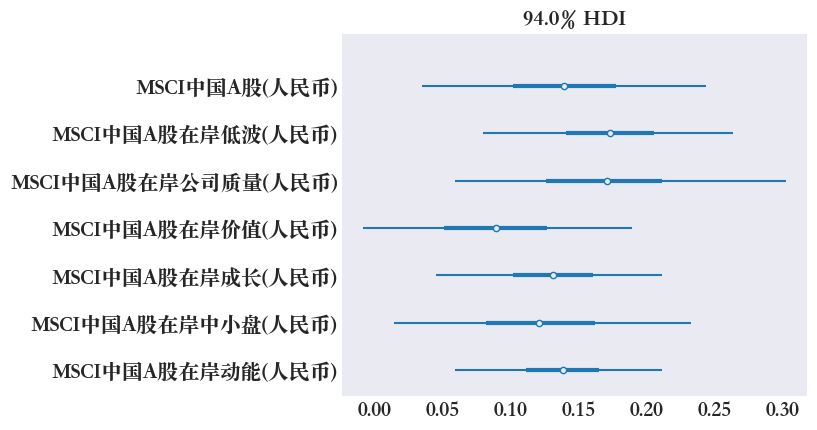

In [183]:
az.plot_forest(
    trace,
    var_names=["μ"],
    combined=True,
    coords={"Fund": Df_Factor.index.values},
    labeller=az.labels.NoVarLabeller(),
)

In [96]:
model_begin_date=datetime.datetime.strptime("2012-09-01")

In [65]:
import datetime

In [66]:
T_begin=2012+(datetime.datetime.strptime("2012-09-01","%Y-%m-%d")-datetime.datetime.strptime("2012-01-01","%Y-%m-%d")).days/365

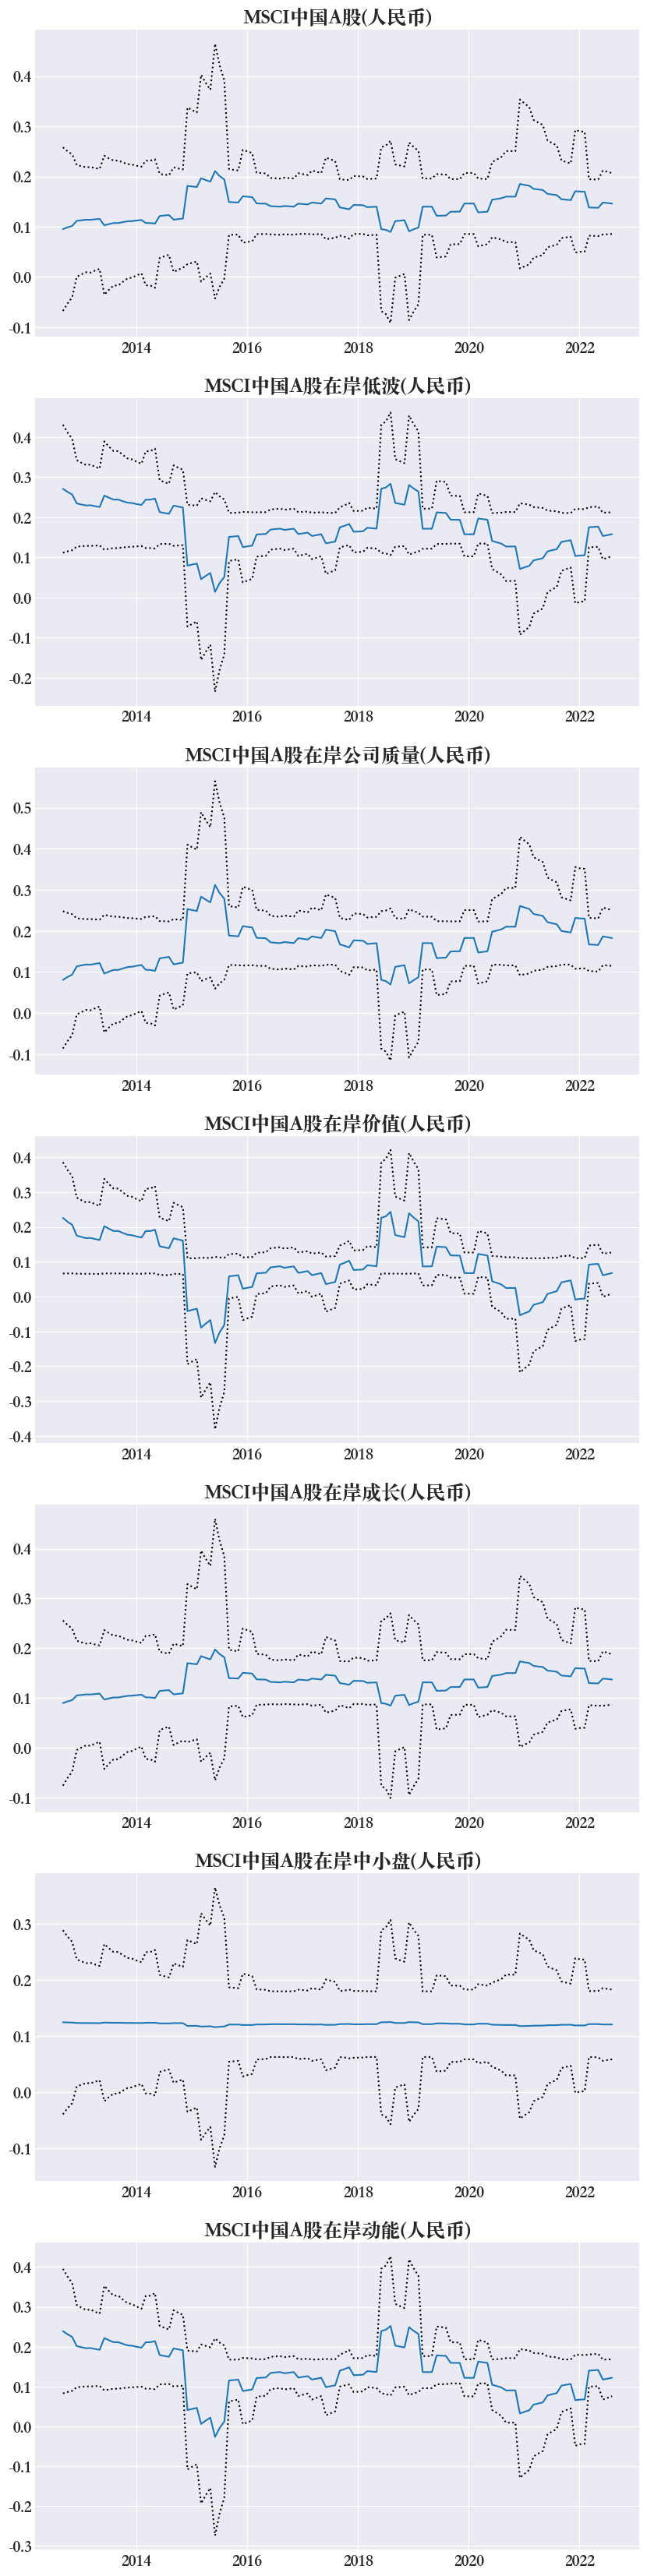

In [166]:
fig,ax =plt.subplots(fund_dim,1,figsize=(10,fund_dim*6))

SR_t_mean_fig=trace.posterior.stack(pooled_chain=("chain", "draw"))["SR_t"].mean(axis=2)
SR_t_std_fig=trace.posterior.stack(pooled_chain=("chain", "draw"))["SR_t"].std(axis=2)
for i in range(fund_dim):
  
    
    TT_figure= _xx+T_begin
    
    
    ax[i].plot(TT_figure,SR_t_mean_fig[i]+1*SR_t_std_fig[i],'k:')
    ax[i].plot(TT_figure,SR_t_mean_fig[i],)
    ax[i].plot(TT_figure,SR_t_mean_fig[i]-1*SR_t_std_fig[i],'k:')
    ax[i].set_title(Df_Factor.index.values[i])
    ax[i].grid()
    
    index_transformer.cumsum().plot()

# 跑模型（Alpha模型）

In [57]:





with pm.Model(coords=coords_test) as model_test:
    _data_alpha_fund = pm.Data("data_alpha_fund", __Df_alpha_model.values.astype(float),mutable=True,dims=("Alpha","date"))
    alpha = pm.Normal("μ_alpha",alpha_mean__prior, alpha_std__prior)
    alpha_n = pm.Normal("IC_alpha",alpha,sigma=1,shape=alpha_len,dims=("Alpha"))
    alpha_n= at.reshape(alpha_n,(alpha_len,1))
    IC_alpha_t = pm.Deterministic("SR_alpha_t",at.tile(alpha_n,(1,T_len)),dims=("Alpha","date"))
        
    chol, corr, stds = pm.LKJCholeskyCov(
    "chol", n=alpha_len, eta=LKJ_eta__prior, sd_dist=pm.Exponential.dist(LKJ_st_prior), compute_corr=True
    )



    #alpha_n_cov = pm.Deterministic("cov", chol.dot(chol.T))     
    
    T_n_cov =np.eye(T_len)
    
    obs=pm.MatrixNormal('vals', mu=IC_alpha_t, rowchol=chol,colcov=T_n_cov)
    
    __Df_alpha_fit_data_model=__Df_alpha_model.values[~np.isnan(__Df_alpha_model.values)]
    alpha_fit_variable = obs[~np.isnan(__Df_alpha_model.values)]
    obss=pm.Normal("_IC",alpha_fit_variable,sigma=0.00001,observed=__Df_alpha_fit_data_model)
  
    #obs = pm.MvNormal("obs_alpha",mu=IC_alpha_t,sigma=at.tile(cov,(1,148),observed=Df_alpha,dims=("alpha", "date"))
RANDOM_SEED = 8924
with model_test:
    trace_alpha = pm.sample(draws=500,random_seed=RANDOM_SEED, init="advi",chains=1,n_init=500, tune=500,target_accept=0.8,return_inferencedata=True)
  
    

Auto-assigning NUTS sampler...
Initializing NUTS using advi...


Finished [100%]: Average Loss = 2.4758e+13
Sequential sampling (1 chains in 1 job)
NUTS: [μ_alpha, IC_alpha, chol, vals]


Sampling 1 chain for 500 tune and 500 draw iterations (500 + 500 draws total) took 19 seconds.


array([<AxesSubplot: title={'center': '94.0% HDI'}>], dtype=object)

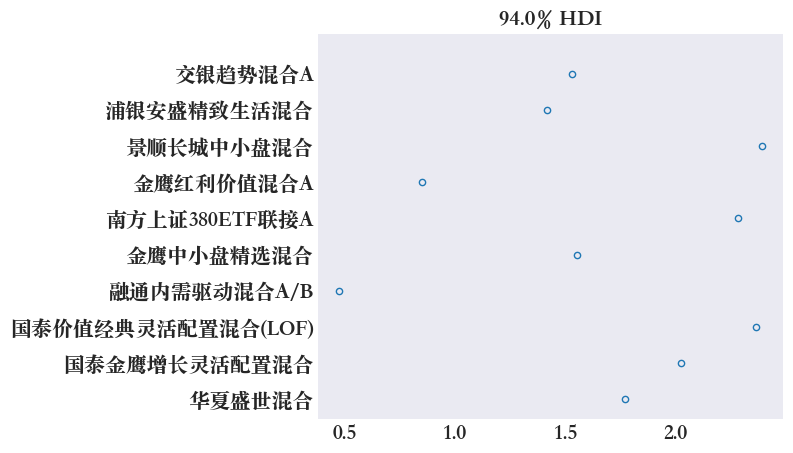

In [181]:
 az.plot_forest(
    trace_alpha,
    var_names=["IC_alpha"],
    combined=True,
    coords={"Alpha":__Df_alpha_model.index.values},
    labeller=az.labels.NoVarLabeller(),
)


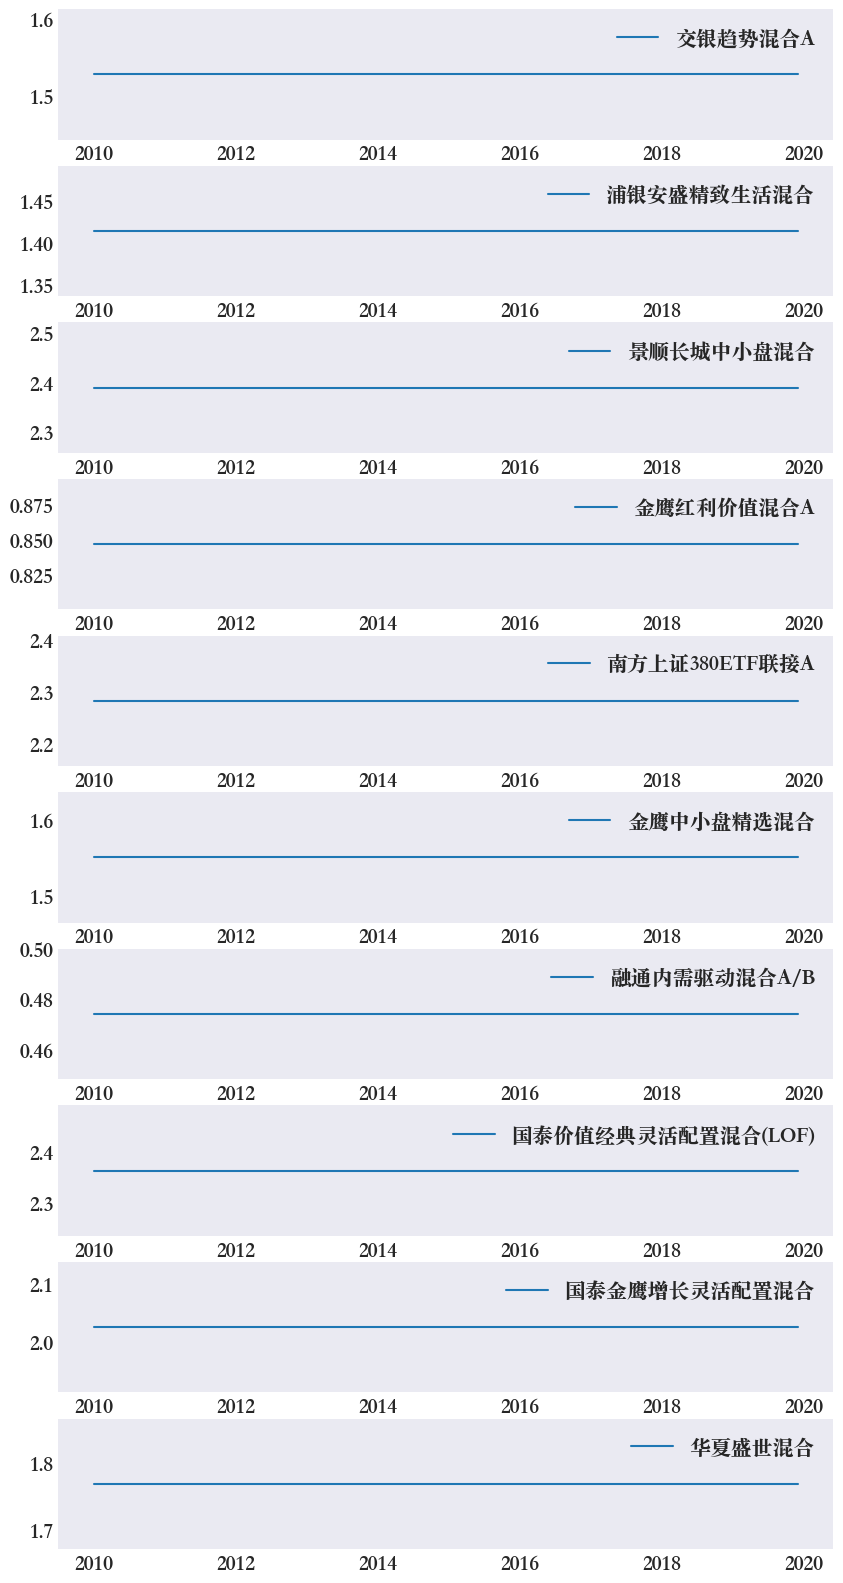

In [ ]:
fig,ax =plt.subplots(alpha_len,1,figsize=(10,20))
for i in range(alpha_len):
    ax[i].plot(_xx+2010,trace_alpha.posterior.stack(pooled_chain=("chain", "draw"))["SR_alpha_t"].mean(axis=2)[i],label=__Df_alpha_model.index.values[i])
    ax[i].legend()

# 跑模型（因子和alpha）

In [20]:
Df_model_example = Df_macro.head(1)

macro_dim =Df_model_example.shape[0]

fund_dim= Df_Factor.shape[0]

model_dim =data_total.shape[0]

model_dim_T=date_model.shape[0]

In [ ]:
coords_test = {"Fund": Df_Factor.index.values, "date":data_total.columns.to_timestamp().date,"macro":Df_model_example.index.values,"Alpha":__Df_alpha_model.index.values}
with pm.Model(coords=coords_test) as model_total:
   #   sharpe_ratio= pm.Normal("μ", prior_mu.T, prior_std)
#     sharpe_ratio=at.reshape(sharpe_ratio,(6,1))
#     beta = pm.Normal("beta", mu=0, sigma=20,shape=(6,3))
     
#     data_macro = pm.Data("data", Df_macro.values.astype(float),mutable=True)


#     sharpe_ratio_t = pm.Deterministic("SR_t",at.tile(sharpe_ratio,(1,148)) + at.dot(beta,data_macro))


#     sd_dist=pm.Exponential("std",1.0,shape=1)
#     #sd_dist=at.reshape(sd_dist,(6,1))
#    # sd_T =at.tile(sd_dist,(1,148)) 

#     obs = pm.Normal("obs",mu=sharpe_ratio_t*sd_dist,sigma=sd_dist,observed=Df_Factor.values)
    

    
    sharpe_ratio= pm.Normal("μ", prior_mu.T, prior_std, dims=("Fund"))
    sharpe_ratio=at.reshape(sharpe_ratio,(fund_dim,1))
    beta = pm.Normal("beta", mu=0, sigma=20,shape=(fund_dim,macro_dim),dims=("Fund","macro"))
    data_macro = pm.Data("data", Df_model_example.values.astype(float),mutable=True,dims=("macro","date"))
    sharpe_ratio_t = pm.Deterministic("SR_t",at.tile(sharpe_ratio,(1,model_dim_T)) + at.dot(beta,data_macro),dims=("Fund","date"))
    #sd_dist=pm.Exponential("std",1.0,shape=6,dims=("Fund"))
    sd_dist=pm.Exponential("std",1.0,shape=fund_dim,dims=("Fund"))
    sd_dist= at.reshape(sd_dist,(fund_dim,1))
    sd_T =at.tile(sd_dist,(1,model_dim_T)) 
    obs = pm.Normal("obs",mu=sharpe_ratio_t*sd_dist,sigma=sd_dist,observed=Df_Factor,dims=("Fund", "date"))
      
    
    ############################################
    ############################################
    ###############################################
    ############################################
    factor_loading = pm.Normal("factor_loading", mu=0, sigma=2,shape=fund_dim,dims=("Fund"))
    factor_loading= at.reshape(factor_loading,(fund_dim,1))
   
    
    factor_loading_T =at.tile(factor_loading,(1,T_len))                         
    factor_loading_T=factor_loading_T*sharpe_ratio_t                
    factor_loading_sum= factor_loading_T.sum(axis=0)
    factor_loading_sum =at.reshape(factor_loading_sum,(1,T_len)) 
    factor_loading_sum_stack=at.tile(factor_loading_sum,(alpha_len,1))  
    
    alpha = pm.Normal("μ_alpha",alpha_mean__prior, alpha_std__prior)
    alpha_n = pm.Normal("IC_alpha",alpha,sigma=1,shape=alpha_len,dims=("Alpha"))
    alpha_n= at.reshape(alpha_n,(alpha_len,1))
   
    
    IC_alpha_t = pm.Deterministic("SR_alpha_t",at.tile(alpha_n,(1,T_len)) + factor_loading_sum_stack,dims=("Alpha","date"))
    
    chol, corr, stds = pm.LKJCholeskyCov(
        "chol", n=alpha_len, eta=LKJ_eta__prior, sd_dist=pm.Exponential.dist(LKJ_st__prior), compute_corr=True
    )
    
    
    
    
    
     
    __stds =  at.reshape(stds,(alpha_len,1)) 
    __stds_t = at.tile(__stds,(1,T_len)) 
    
    T_n_cov =np.eye(T_len)
    
    obs_sharpe=pm.MatrixNormal('vals', mu=IC_alpha_t*__stds_t, rowchol=chol,colcov=T_n_cov)
    
    __Df_alpha_fit_data_model=__Df_alpha_model.values[~np.isnan(__Df_alpha_model.values)]
    alpha_fit_variable = obs_sharpe[~np.isnan(__Df_alpha_model.values)]
    obss=pm.Normal("_IC",alpha_fit_variable,sigma=0.00001,observed=__Df_alpha_fit_data_model)
  
    

RANDOM_SEED = 8924
with model_total:
    trace_alpha_total = pm.sample(draws=5000,random_seed=RANDOM_SEED, init="advi",chains=2,n_init=500, tune=500,target_accept=0.8,return_inferencedata=True)
  
    

       

Auto-assigning NUTS sampler...
Initializing NUTS using advi...


Finished [100%]: Average Loss = 2.4775e+13
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [μ, beta, std, factor_loading, μ_alpha, IC_alpha, chol, vals]


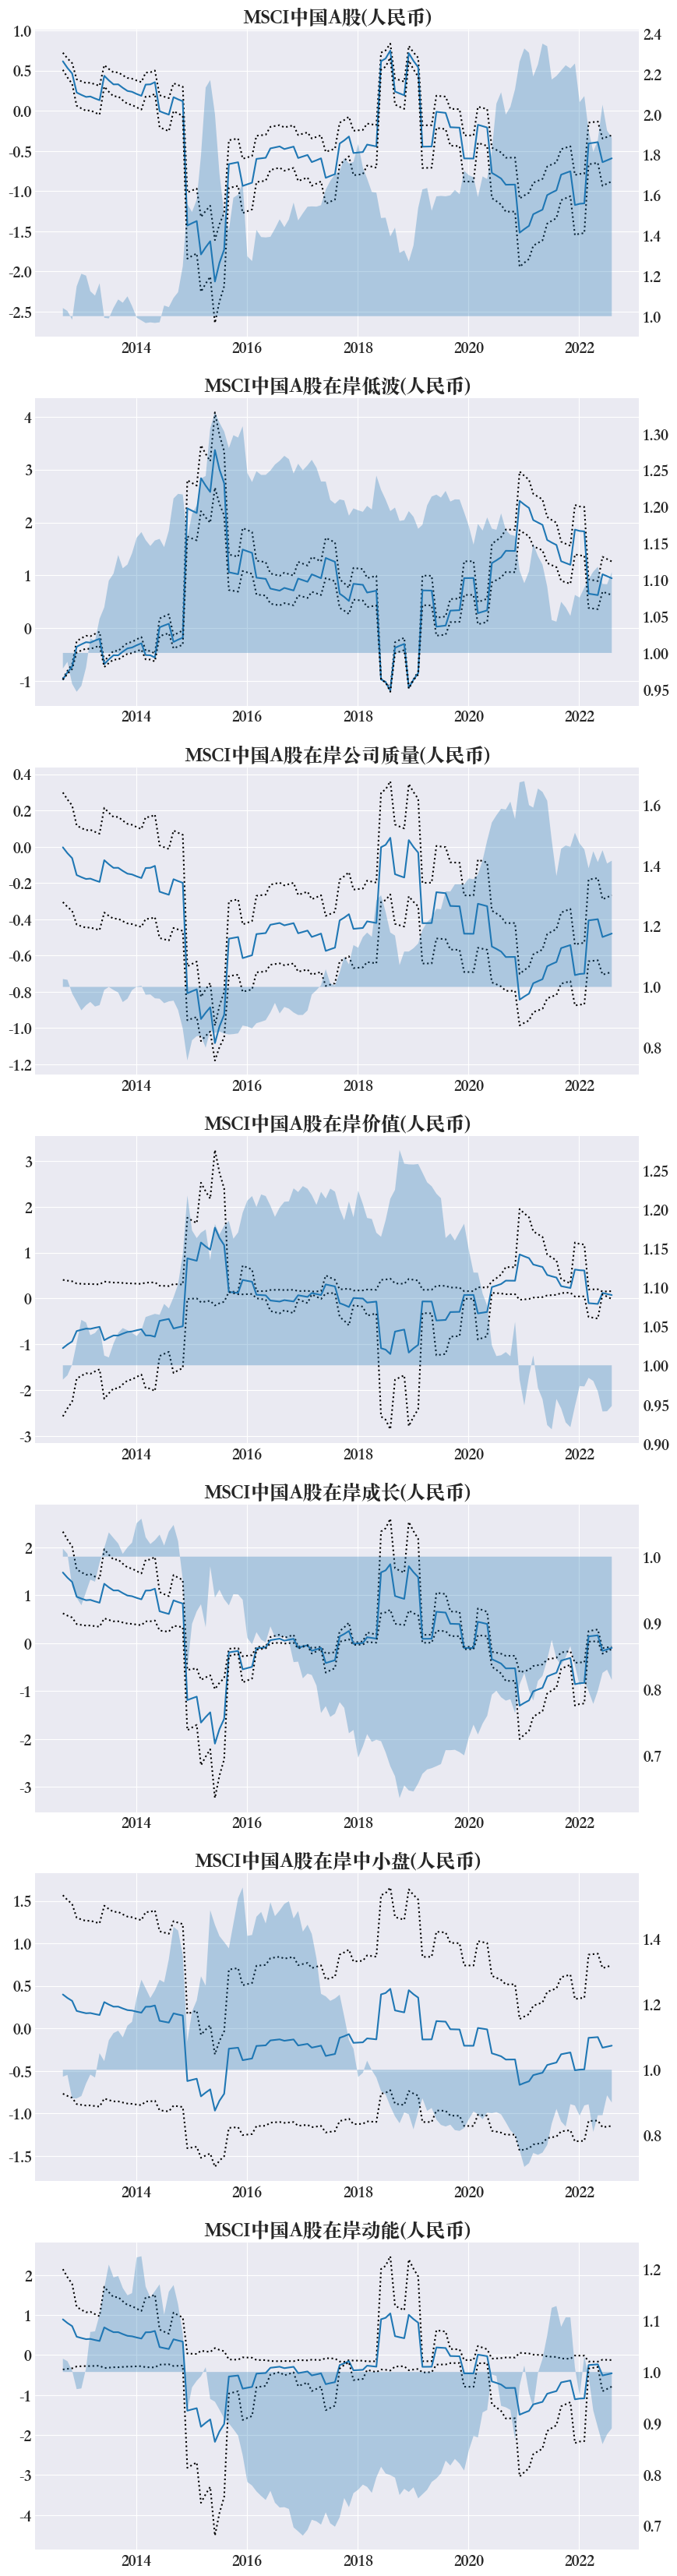

In [206]:
fig,ax =plt.subplots(fund_dim,1,figsize=(10,fund_dim*6))

SR_t_mean_fig=trace_alpha_total.posterior.stack(pooled_chain=("chain", "draw"))["SR_t"].mean(axis=2)
SR_t_std_fig=trace_alpha_total.posterior.stack(pooled_chain=("chain", "draw"))["SR_t"].std(axis=2)


data_fund=np.exp(Df_Factor.T.cumsum())
for i in range(fund_dim):
  
    
    TT_figure= _xx+T_begin
    
    
    ax[i].plot(TT_figure,SR_t_mean_fig[i]+1*SR_t_std_fig[i],':',color="k")
    ax[i].plot(TT_figure,SR_t_mean_fig[i])
    ax[i].plot(TT_figure,SR_t_mean_fig[i]-1*SR_t_std_fig[i],':',color="k")
    ax[i].set_title(Df_Factor.index.values[i])
    ax[i].grid()
    
    
    ax_right = ax[i].twinx()
    
    #__drawdown =(draw_down_price[i] - draw_down_price[i+"_max"])/draw_down_price[i+"_max"]
    #print(__drawdown)
    ax_right.fill_between(TT_figure,data_fund[Df_Factor.index.values[i]],1,alpha=0.3)

    #ax[i].legend()

array([<AxesSubplot: title={'center': '94.0% HDI'}>], dtype=object)

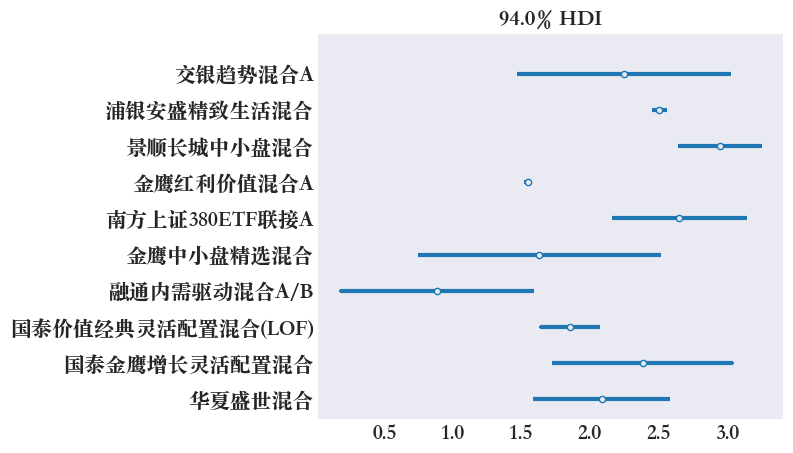

In [191]:
 az.plot_forest(
    trace_alpha_total,
    var_names=["IC_alpha"],
    #kind="ridgeplot",
    combined=True,
    coords={"Alpha":__Df_alpha_model.index.values},
    labeller=az.labels.NoVarLabeller(),
)

# 跑BMA模型

In [ ]:
# Df_macro.index
# model_name = ["model_total_"+i for i in Df_macro.index]

In [ ]:


fund_dim= Df_Factor.shape[0]

model_dim =data_total.shape[0]

model_dim_T=date_model.shape[0]

In [ ]:

for i in Df_macro.index:
    model_name = "model_total_"+i
    result_name = "trace_alpha_total_"+i
    Df_model_example = Df_macro.loc[[i]]
    
    macro_dim =Df_model_example.shape[0]
    coords_test = {"Fund": Df_Factor.index.values, "date":data_total.columns.to_timestamp().date,"macro":Df_model_example.index.values,"Alpha":__Df_alpha_model.index.values}
    s="""with pm.Model(coords=coords_test) as {}:
        sharpe_ratio= pm.Normal("μ", prior_mu.T, prior_std, dims=("Fund"))
        sharpe_ratio=at.reshape(sharpe_ratio,(fund_dim,1))
        beta = pm.Normal("beta", mu=0, sigma=20,shape=(fund_dim,macro_dim),dims=("Fund","macro"))
        data_macro = pm.Data("data", Df_model_example.values.astype(float),mutable=True,dims=("macro","date"))
        sharpe_ratio_t = pm.Deterministic("SR_t",at.tile(sharpe_ratio,(1,model_dim_T)) + at.dot(beta,data_macro),dims=("Fund","date"))
        #sd_dist=pm.Exponential("std",1.0,shape=6,dims=("Fund"))
        sd_dist=pm.Exponential("std",1.0,shape=fund_dim,dims=("Fund"))
        sd_dist= at.reshape(sd_dist,(fund_dim,1))
        sd_T =at.tile(sd_dist,(1,model_dim_T)) 
        obs = pm.Normal("obs",mu=sharpe_ratio_t*sd_dist,sigma=sd_dist,observed=Df_Factor,dims=("Fund", "date"))


        ############################################
        ############################################
        ###############################################
        ############################################
        factor_loading = pm.Normal("factor_loading", mu=0, sigma=2,shape=fund_dim,dims=("Fund"))
        factor_loading= at.reshape(factor_loading,(fund_dim,1))


        factor_loading_T =at.tile(factor_loading,(1,T_len))                         
        factor_loading_T=factor_loading_T*sharpe_ratio_t                
        factor_loading_sum= factor_loading_T.sum(axis=0)
        factor_loading_sum =at.reshape(factor_loading_sum,(1,T_len)) 
        factor_loading_sum_stack=at.tile(factor_loading_sum,(alpha_len,1))  

        alpha = pm.Normal("μ_alpha",alpha_mean__prior, alpha_std__prior)
        alpha_n = pm.Normal("IC_alpha",alpha,sigma=1,shape=alpha_len,dims=("Alpha"))
        alpha_n= at.reshape(alpha_n,(alpha_len,1))


        IC_alpha_t = pm.Deterministic("SR_alpha_t",at.tile(alpha_n,(1,T_len)) + factor_loading_sum_stack,dims=("Alpha","date"))

        chol, corr, stds = pm.LKJCholeskyCov(
            "chol", n=alpha_len, eta=LKJ_eta__prior, sd_dist=pm.Exponential.dist(LKJ_st__prior), compute_corr=True
        )






        __stds =  at.reshape(stds,(alpha_len,1)) 
        __stds_t = at.tile(__stds,(1,T_len)) 

        T_n_cov =np.eye(T_len)

        obs_sharpe=pm.MatrixNormal('vals', mu=IC_alpha_t*__stds_t, rowchol=chol,colcov=T_n_cov)

        __Df_alpha_fit_data_model=__Df_alpha_model.values[~np.isnan(__Df_alpha_model.values)]
        alpha_fit_variable = obs_sharpe[~np.isnan(__Df_alpha_model.values)]
        obss=pm.Normal("_IC",alpha_fit_variable,sigma=0.00001,observed=__Df_alpha_fit_data_model)
    """.format(model_name)
    exec(s)



    RANDOM_SEED = 8924
    h="""with {}:
        {} = pm.sample(draws=5000,random_seed=RANDOM_SEED, init="advi",chains=2,n_init=500, tune=500,target_accept=0.8,return_inferencedata=True)
    """.format(model_name,result_name)
    exec(h)

       

In [281]:
# traces = [trace_alpha_total_dp,trace_alpha_total_dy]
 #az.plot_forest(traces, figsize=(10, 5));

In [ ]:
#  az.plot_forest(
#     traces,
#     var_names=["IC_alpha"],
#     #kind="ridgeplot",
#     combined=True,
#     coords={"Alpha":__Df_alpha_model.index.values},
#     labeller=az.labels.NoVarLabeller(),
# )

In [30]:
traces=[]
for i in Df_macro.index:

    result_name = "trace_alpha_total_"+i
    traces.append(result_name)

In [34]:
SR_t_mode_pred=[]
for j in Df_macro.index:
    z="""SR_t_mean_fig=trace_alpha_total_{}.posterior.stack(pooled_chain=("chain", "draw"))["SR_t"].mean(axis=2)""".format(j)
    
    exec(z)
    
    #SR_t_std_fig=trace_alpha_total.posterior.stack(pooled_chain=("chain", "draw"))["SR_t"].std(axis=2)
    SR_t_mode_pred.append(SR_t_mean_fig)


In [95]:
# x=trace.posterior.stack(pooled_chain=("chain", "draw"))["SR_t"][0].date
# timestamp = x.values-x.values[0]
# _xx= np.array([i.days/365 for i in timestamp])


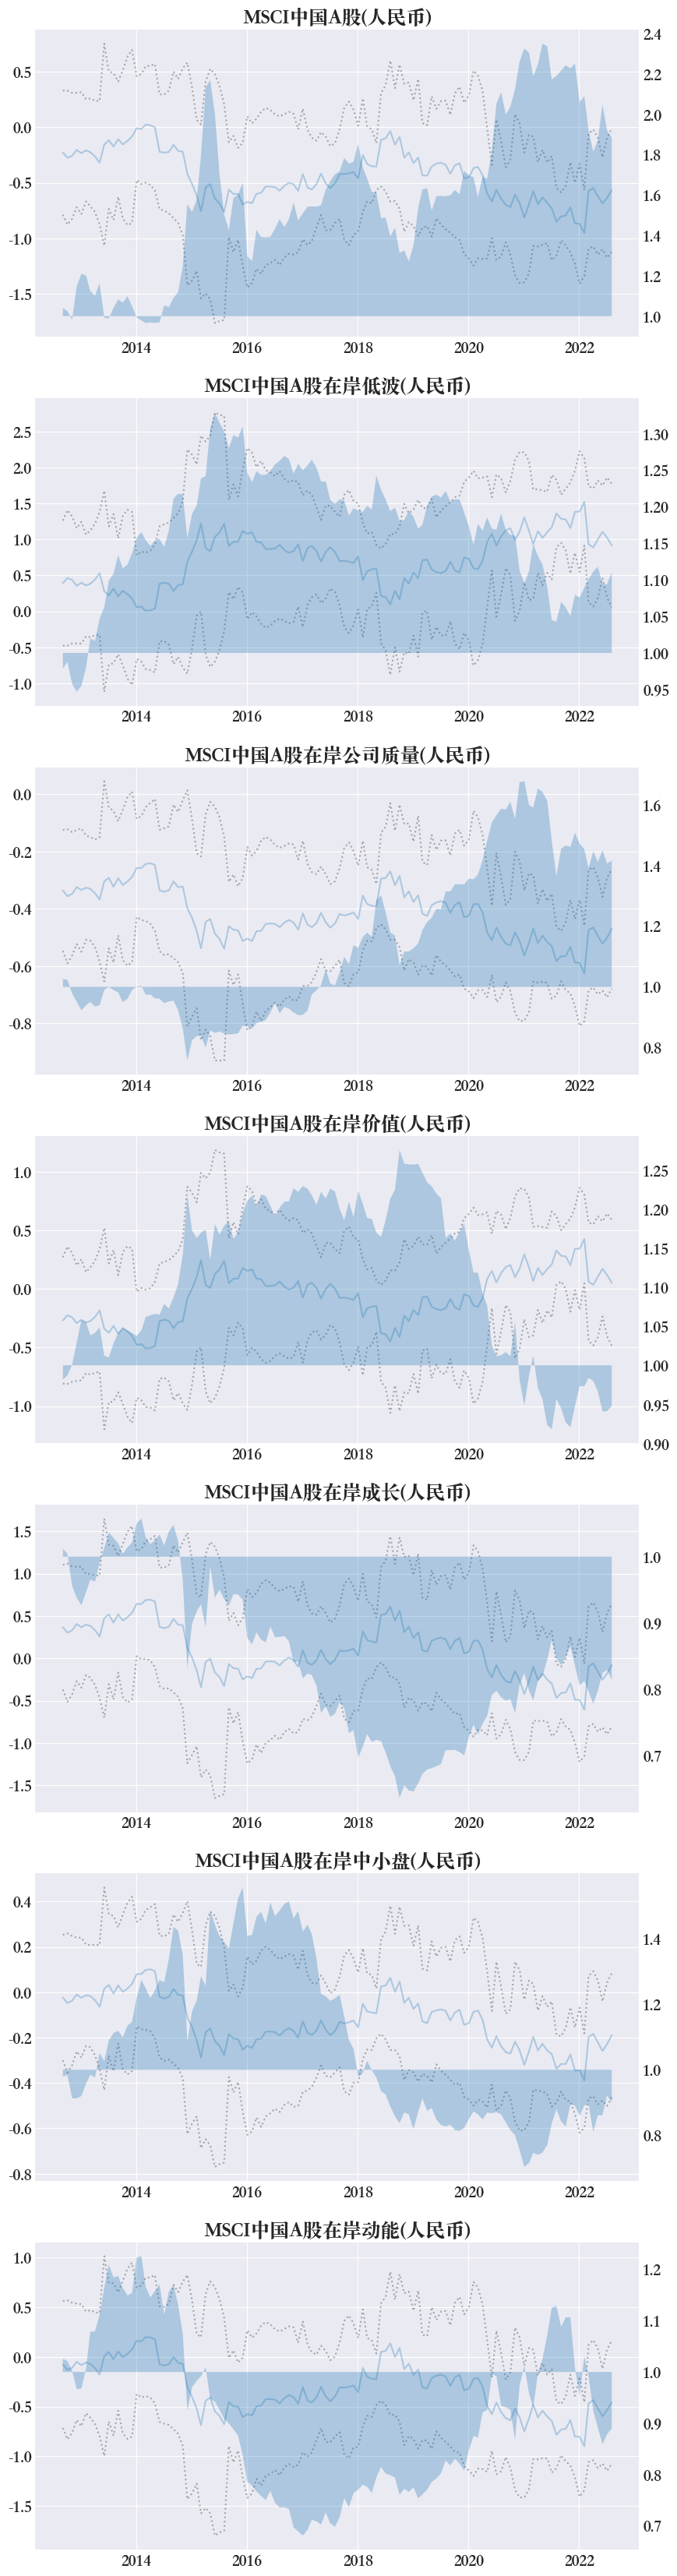

In [94]:
fig,ax =plt.subplots(fund_dim,1,figsize=(10,fund_dim*6))




data_fund=np.exp(Df_Factor.T.cumsum())
for i in range(fund_dim):


    TT_figure= _xx+T_begin
    SR_t_mean_fig_i=[]
    SR_t_mean_fig_i=[]
    for j in range(len(traces)):
        SR_t_mean_fig = SR_t_mode_pred[j]
    #ax[i].plot(TT_figure,SR_t_mean_fig[i]+1*SR_t_std_fig[i],':',color="k")

        SR_t_mean_fig_i.append(pd.Series(SR_t_mean_fig[i]))
    SR_t_mean_fig_i_df=pd.concat(SR_t_mean_fig_i,axis=1)
    model_average=SR_t_mean_fig_i_df.mean(axis=1)
    model_std=SR_t_mean_fig_i_df.std(axis=1)
    ax[i].plot(TT_figure,model_average-model_std,"k:",alpha=0.3)
    ax[i].plot(TT_figure,model_average+model_std,"k:",alpha=0.3)
    ax[i].plot(TT_figure,model_average,alpha=0.3)
    
    #ax[i].plot(TT_figure,SR_t_mean_fig[i]-1*SR_t_std_fig[i],':',color="k")
    ax[i].set_title(Df_Factor.index.values[i])
    ax[i].grid()


    ax_right = ax[i].twinx()

    #__drawdown =(draw_down_price[i] - draw_down_price[i+"_max"])/draw_down_price[i+"_max"]
    #print(__drawdown)
    ax_right.fill_between(TT_figure,data_fund[Df_Factor.index.values[i]],1,alpha=0.3)


In [ ]:
model_dict = dict(zip(["model_0", "model_1", "model_2"], traces))
comp = az.compare(model_dict)
comp

In [ ]:
model_table_name=[]
trace_table=[]
for i in Df_macro.index:
    model_table_name.append("model_total_"+i)
    trace_table_name.append("trace_alpha_total_"+i)
   

In [1]:
trace_table_name

NameError: name 'trace_table_name' is not defined

In [97]:
"""trace=[model_table_name_{}]

['model_total_dp',
 'model_total_dy',
 'model_total_ep',
 'model_total_de',
 'model_total_svar',
 'model_total_bm',
 'model_total_ntis',
 'model_total_tbl',
 'model_total_ity',
 'model_total_itr',
 'model_total_tms',
 'model_total_dfy',
 'model_total_infl']

In [ ]:
result_name = "trace_alpha_total_"+i